[Link to tutorial](https://github.com/gjreda/pydata2014nyc)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('max_columns', 50)

In [2]:
mo = pd.read_csv('https://raw.githubusercontent.com/gjreda/pydata2014nyc/master/data/mariano-rivera.csv')
mo.tail()

,Year,Age,Tm,Lg,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB,Awards
14,2009,39,NYY,AL,3,3,0.500,1.76,66,0,55,0,0,44,66.1,48,14,13,7,12,1,72,1,0,1,257,262,0.905,6.5,0.9,1.6,9.8,6.00,ASMVP-14
15,2010,40,NYY,AL,3,3,0.500,1.80,61,0,55,0,0,33,60.0,39,14,12,2,11,3,45,5,0,0,230,241,0.833,5.9,0.3,1.7,6.8,4.09,AS
16,2011,41,NYY,AL,1,2,0.333,1.91,64,0,54,0,0,44,61.1,47,13,13,3,8,2,60,2,0,1,233,226,0.897,6.9,0.4,1.2,8.8,7.50,ASCYA-8
17,2012,42,NYY,AL,1,1,0.500,2.16,9,0,9,0,0,5,8.1,6,2,2,0,2,2,8,0,0,0,32,203,0.960,6.5,0.0,2.2,8.6,4.00,NaN
18,2013,43,NYY,AL,6,2,0.750,2.11,64,0,60,0,0,44,64.0,58,16,15,6,9,3,54,1,0,0,256,192,1.047,8.2,0.8,1.3,7.6,6.00,AS


In [3]:
#removes $ sign formatting to get price into floating point
clean = lambda s: s.replace('$', '')[:-1] if '.' in s else s.replace('$', '') # a lot going on here
url = 'https://raw.github.com/gjreda/best-sandwiches/master/data/best-sandwiches-geocode.tsv'
sandwiches = pd.read_table(url, sep='\t', converters={'price': lambda s: float(clean(s))})

sandwiches.head()

,rank,sandwich,restaurant,description,price,address,city,phone,website,full_address,formatted_address,lat,lng
0,1,BLT,Old Oak Tap,The B is applewood smoked&mdash;nice and snapp...,10.0,2109 W. Chicago Ave.,Chicago,773-772-0406,theoldoaktap.com,"2109 W. Chicago Ave., Chicago","2109 West Chicago Avenue, Chicago, IL 60622, USA",41.895734,-87.679960
1,2,Fried Bologna,Au Cheval,Thought your bologna-eating days had retired w...,9.0,800 W. Randolph St.,Chicago,312-929-4580,aucheval.tumblr.com,"800 W. Randolph St., Chicago","800 West Randolph Street, Chicago, IL 60607, USA",41.884672,-87.647754
2,3,Woodland Mushroom,Xoco,Leave it to Rick Bayless and crew to come up w...,9.5,445 N. Clark St.,Chicago,312-334-3688,rickbayless.com,"445 N. Clark St., Chicago","445 North Clark Street, Chicago, IL 60654, USA",41.890602,-87.630925
3,4,Roast Beef,Al&rsquo;s Deli,"The Francophile brothers behind this deli, whi...",9.4,914 Noyes St.,Evanston,NaN,alsdeli.net,"914 Noyes St., Evanston","914 Noyes Street, Evanston, IL 60201, USA",42.058442,-87.684425
4,5,PB&amp;L,Publican Qualty Meats,"When this place opened in February, it quickly...",10.0,825 W. Fulton Mkt.,Chicago,312-445-8977,publicanqualitymeats.com,"825 W. Fulton Mkt., Chicago","825 West Fulton Market, Chicago, IL 60607, USA",41.886637,-87.648553


## Pandas can read .json too

In [4]:
gh = pd.read_json('https://api.github.com/repos/pydata/pandas/issues?per_page=3')
gh[['body', 'created_at', 'title', 'url']].head(3)
#Pull json entries [[]]

,body,created_at,title,url
0,"This should work, but the assert fails:\r\n\r\...",2016-08-02 19:08:37,Round trip through HDF5 with format=table and ...,https://api.github.com/repos/pydata/pandas/iss...
1,Want any updates to the actual install instruc...,2016-08-02 12:30:44,DOC: Update README to link to install instruct...,https://api.github.com/repos/pydata/pandas/iss...
2,Title is self-explanatory. Closes #4623.,2016-08-02 10:38:42,TST: Add first line comment tests in read_csv,https://api.github.com/repos/pydata/pandas/iss...


## Clipboard

In [5]:
#clip = pd.read_clipboard()
#clip.head()

# SQL

In [6]:
from pandas.io import sql
import sqlite3

In [7]:
conn = sqlite3.connect('towed.db') #connection string
query = "SELECT * FROM towed"
towed = sql.read_sql(query, con=conn, parse_dates={'date':'%m/%d/%Y'})
towed.head()

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129
2,2014-11-18,CHRY,VN,,SIL,V847641,IL,701 N. Sacramento,(773) 265-7605,6798366
3,2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
4,2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128


In [8]:
query2 = "Select * from towed where make = 'HYUN'"
towed2 = sql.read_sql(query2, con=conn)
towed2.head()

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,11/18/2014,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
1,11/18/2014,HYUN,4D,,GLD,V391056,IL,701 N. Sacramento,(773) 265-7605,6798355
2,11/18/2014,HYUN,4D,,GLD,V732368,IL,701 N. Sacramento,(773) 265-7605,6798325
3,11/17/2014,HYUN,4D,,SIL,V504997,IL,701 N. Sacramento,(773) 265-7605,6798258
4,11/15/2014,HYUN,4D,,RED,V128618,IL,10300 S. Doty,(773) 568-8495,2750212


In [9]:
#USE parse_dates={'date':'%m/%d/%Y'} to get dates into a different format

In [10]:
towed[109:119] #regular slicing/indexing

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
109,2014-11-18,NISS,4D,,GRY,E203840,IL,400 E. Lower Wacker,(312) 744-7550,6798305
110,2014-11-18,FORD,LL,,WHI,304356D,IL,701 N. Sacramento,(773) 265-7605,6798302
111,2014-11-18,CHEV,4D,,SIL,N649600,IL,10300 S. Doty,(773) 568-8495,2750395
112,2014-11-18,CHEV,PK,,RED,70478D,IL,10300 S. Doty,(773) 568-8495,2750391
113,2014-11-18,PONT,4D,,SIL,A569679,IL,10300 S. Doty,(773) 568-8495,2750388
114,2014-11-18,CHRY,4D,,SIL,2040028,IL,10300 S. Doty,(773) 568-8495,2750390
115,2014-11-18,FORD,VN,,TAN,S670967,IL,10300 S. Doty,(773) 568-8495,2750393
116,2014-11-18,JEEP,,,,S743026,IL,10300 S. Doty,(773) 568-8495,2750392
117,2014-11-18,MERZ,2D,,SIL,V526971,IL,10300 S. Doty,(773) 568-8495,2750389
118,2014-11-17,BUIC,4D,,SIL,E380034,IL,10300 S. Doty,(773) 568-8495,2750385


In [11]:
towed.info() #gives you information on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 10 columns):
date              5065 non-null datetime64[ns]
make              5065 non-null object
style             5065 non-null object
model             5065 non-null object
color             5065 non-null object
plate             5065 non-null object
state             5065 non-null object
towed_to          5065 non-null object
facility_phone    5065 non-null object
inventory_num     5065 non-null int64
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 395.8+ KB


In [12]:
mo.describe() #Basic stats on the dataframe

,Year,Age,W,L,W-L%,ERA,G,GS,GF,CG,SHO,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,WHIP,H/9,HR/9,BB/9,SO/9,SO/BB
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2004.000000,34.000000,4.315789,3.157895,0.570158,2.222105,58.684211,0.526316,50.105263,0.0,0.0,34.315789,67.315789,52.526316,17.894737,16.578947,3.736842,15.052632,2.157895,61.736842,2.421053,0.157895,0.684211,268.578947,222.157895,0.998684,6.994737,0.489474,1.994737,8.142105,4.870000
std,5.627314,5.627314,2.083070,1.462994,0.174293,0.918861,17.023032,2.294157,19.944074,0.0,0.0,15.198877,18.657506,15.886292,8.305920,8.064434,2.423086,8.140937,1.500487,24.250641,1.894899,0.374634,0.749269,75.045405,56.108291,0.171747,1.107787,0.328117,0.779939,1.403296,2.553853
min,1995.000000,25.000000,1.000000,0.000000,0.200000,1.380000,9.000000,0.000000,2.000000,0.0,0.0,0.000000,8.100000,6.000000,2.000000,2.000000,0.000000,2.000000,0.000000,8.000000,0.000000,0.000000,0.000000,32.000000,84.000000,0.665000,5.200000,0.000000,0.800000,5.300000,1.700000
25%,1999.500000,29.500000,3.000000,2.000000,0.500000,1.800000,61.000000,0.000000,51.500000,0.0,0.0,31.500000,62.550000,45.000000,14.000000,13.000000,2.500000,10.500000,1.000000,51.500000,1.000000,0.000000,0.000000,251.000000,192.000000,0.901000,6.300000,0.300000,1.300000,6.900000,3.350000
50%,2004.000000,34.000000,4.000000,3.000000,0.571000,1.910000,64.000000,0.000000,57.000000,0.0,0.0,39.000000,70.200000,58.000000,16.000000,14.000000,3.000000,12.000000,2.000000,60.000000,2.000000,0.000000,1.000000,277.000000,233.000000,0.994000,6.900000,0.400000,2.100000,8.000000,4.090000
75%,2008.500000,38.500000,6.000000,4.000000,0.651500,2.250000,66.000000,0.000000,60.500000,0.0,0.0,44.000000,75.100000,63.000000,21.000000,19.000000,4.500000,19.000000,3.000000,73.000000,4.000000,0.000000,1.000000,303.500000,254.500000,1.070500,7.600000,0.600000,2.400000,9.250000,6.085000
max,2013.000000,43.000000,8.000000,6.000000,1.000000,5.510000,74.000000,10.000000,69.000000,0.0,0.0,53.000000,107.200000,73.000000,43.000000,41.000000,11.000000,34.000000,6.000000,130.000000,6.000000,1.000000,2.000000,425.000000,316.000000,1.507000,9.500000,1.500000,4.000000,10.900000,12.830000


In [13]:
towed.set_index('date', inplace = True)

In [14]:
towed.ix['2014-11-04'].head(5)

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244


In [15]:
# SELECT *
# FROM towed
# WHERE date = '2014-11-04'
# LIMIT 5;

query3 = "SELECT * FROM towed where date = '2014-11-04 LIMIT 5"
towed3 = sql.read_sql(query, con=conn, parse_dates={'date':'%m/%d/%Y'})
towed3.head()

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
0,2014-11-18,FORD,LL,,BLK,S105053,IL,10300 S. Doty,(773) 568-8495,2750424
1,2014-11-18,HOND,4D,ACC,BLK,S415270,IL,400 E. Lower Wacker,(312) 744-7550,917129
2,2014-11-18,CHRY,VN,,SIL,V847641,IL,701 N. Sacramento,(773) 265-7605,6798366
3,2014-11-18,HYUN,4D,,SIL,N756530,IL,400 E. Lower Wacker,(312) 744-7550,917127
4,2014-11-18,TOYT,4D,,WHI,K702211,IL,400 E. Lower Wacker,(312) 744-7550,917128


In [16]:
towed.ix['2014-11-04', 'make'] #will give you a list of distinct values

date
2014-11-04    LINC
2014-11-04    CHRY
2014-11-04    PLYM
2014-11-04    CHEV
2014-11-04    CHEV
2014-11-04    FORD
2014-11-04    DODG
2014-11-04    DODG
2014-11-04    ZCZY
2014-11-04    CHEV
2014-11-04    CHEV
2014-11-04    OLDS
2014-11-04    OLDS
2014-11-04    LINC
2014-11-04    LINC
2014-11-04     ISU
2014-11-04    HYUN
2014-11-04    TOYT
2014-11-04    CHEV
2014-11-04    CHEV
2014-11-04     SAA
2014-11-04    PONT
2014-11-04    DODG
2014-11-04    NISS
2014-11-04    DODG
2014-11-04    OLDS
2014-11-04    PONT
2014-11-04    DODG
2014-11-04    FORD
2014-11-04    FORD
              ... 
2014-11-04    LINC
2014-11-04    TOYT
2014-11-04    TOYT
2014-11-04    MASE
2014-11-04    DODG
2014-11-04    NISS
2014-11-04    FORD
2014-11-04    FORD
2014-11-04    DODG
2014-11-04    PONT
2014-11-04    JEEP
2014-11-04    LINC
2014-11-04    FORD
2014-11-04    FORD
2014-11-04    DODG
2014-11-04    FORD
2014-11-04    SATR
2014-11-04    OLDS
2014-11-04    NISS
2014-11-04    FORD
2014-11-04    DODG
2014-11

In [17]:
# SELECT *
# FROM towed
# WHERE date = '2014-11-04';
towed.reset_index(inplace=True)
towed[towed['date'] == '2014-11-04']

,date,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
1350,2014-11-04,LINC,LL,,GRN,V322831,IL,10300 S. Doty,(773) 568-8495,2749375
1351,2014-11-04,CHRY,VN,,BLU,7101535,IL,701 N. Sacramento,(773) 265-7605,6797250
1352,2014-11-04,PLYM,VN,TK,GRN,V144454,IL,701 N. Sacramento,(773) 265-7605,6797248
1353,2014-11-04,CHEV,VN,TK,BLK,K719308,IL,701 N. Sacramento,(773) 265-7605,6797246
1354,2014-11-04,CHEV,4D,IMP,SIL,UG5J2P,MO,701 N. Sacramento,(773) 265-7605,6797244
1355,2014-11-04,FORD,SW,,SIL,S860992,IL,10300 S. Doty,(773) 568-8495,2749362
1356,2014-11-04,DODG,VN,,RED,571R990,IL,701 N. Sacramento,(773) 265-7605,6797239
1357,2014-11-04,DODG,PK,TK,BRO,1381812,IL,10300 S. Doty,(773) 568-8495,2749364
1358,2014-11-04,ZCZY,2D,,BRO,,IL,10300 S. Doty,(773) 785-9752,1714849
1359,2014-11-04,CHEV,4D,,SIL,,,10300 S. Doty,(773) 568-8495,2749363


In [18]:
towed.set_index('date', inplace=True)

In [19]:
cols = ['make', 'color', 'state']
towed[cols][:5] #indexing with column then rows

,make,color,state
date,,,
2014-11-18,FORD,BLK,IL
2014-11-18,HOND,BLK,IL
2014-11-18,CHRY,SIL,IL
2014-11-18,HYUN,SIL,IL
2014-11-18,TOYT,WHI,IL


In [20]:
# SELECT *
# FROM towed
# WHERE make = 'FORD'
# ORDER BY state DESC
# LIMIT 5;

towed[towed['make']=='FORD'].sort_index().head()

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-08-20,FORD,VN,TK,MAR,V468364,IL,701 N. Sacramento,(773) 265-7605,6791149
2014-08-21,FORD,VN,TK,BLK,V414355,IL,10300 S. Doty,(773) 568-8495,2744211
2014-08-21,FORD,LL,TK,TAN,S662278,IL,10300 S. Doty,(773) 568-8495,2744208
2014-08-21,FORD,4D,,BLU,5311TX,IL,701 N. Sacramento,(773) 265-7605,6791157
2014-08-21,FORD,LL,TK,BLK,N762179,IL,10300 S. Doty,(773) 568-8495,2744213


In [21]:
# SELECT *
# FROM towed
# WHERE color = 'BLK'
#   AND state = 'MI';

towed[(towed['color']=='BLK') & (towed['state']=='MI')]

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-12,DODG,LL,,BLK,CLV6160,MI,701 N. Sacramento,(773) 265-7605,6797946
2014-09-08,CHEV,2D,,BLK,3KMT29,MI,10300 S. Doty,(773) 568-8495,2745448
2014-08-27,KIA,4D,,BLK,DAN1057,MI,701 N. Sacramento,(773) 265-7605,6791554


In [22]:
# SELECT *
# FROM towed
# WHERE make = 'PORS'
#   OR state = 'NY'
# ORDER BY make, color DESC;

towed[(towed['make']=='PORS') | (towed['state']=='NY')].sort(['make', 'color'], ascending=[True, False])

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-11-11,BUIC,LL,,WHI,GNW2480,NY,10300 S. Doty,(773) 568-8495,2749681
2014-10-08,PORS,LL,,RED,V515513,IL,701 N. Sacramento,(773) 265-7605,6795116
2014-11-01,PORS,LL,,BLK,V671447,IL,10300 S. Doty,(773) 568-8495,2749122
2014-09-25,PORS,LL,,BLK,,IL,701 N. Sacramento,(773) 265-7605,6794214
2014-09-19,PORS,LL,,BLK,V733398,IL,701 N. Sacramento,(773) 265-7605,6793740
2014-09-01,SUZI,4D,,GRY,EHL9836,NY,10300 S. Doty,(773) 568-8495,2744842


In [23]:
md = (towed['style'] == '4D') & (towed['state']== 'IL')

In [24]:
md.value_counts() #Get count for what the filter pulls

True     2570
False    2495
dtype: int64

In [25]:
towed[md][['make', 'model', 'color']].head() #can define variable with the filter and u

,make,model,color
date,,,
2014-11-18,HOND,ACC,BLK
2014-11-18,HYUN,,SIL
2014-11-18,TOYT,,WHI
2014-11-18,CHEV,,BLK
2014-11-18,MERZ,,BLK


In [26]:
towed[towed.duplicated()] #can pull up duplicated rows

,make,style,model,color,plate,state,towed_to,facility_phone,inventory_num
date,,,,,,,,,
2014-11-18,NISS,4D,,GRY,E203840,IL,400 E. Lower Wacker,(312) 744-7550,6798305
2014-11-06,BUIC,4D,,PLE,R4548,IL,701 N. Sacramento,(773) 265-7605,6797394
2014-11-03,FORD,4D,,BLK,S227831,IL,10300 S. Doty,(773) 568-8495,2749299
2014-10-19,MERZ,LL,TK,BLK,MINE-IP,IL,701 N. Sacramento,(773) 265-7605,6795998
2014-10-11,FORD,LL,,RED,,IL,10300 S. Doty,(773) 568-8495,2747534
2014-09-27,AUDI,4D,,SIL,EWA7707,NY,701 N. Sacramento,(773) 265-7605,6794421
2014-09-04,CHEV,4D,LUM,WHI,S880655,IL,10300 S. Doty,(773) 568-8495,2745054
2014-09-03,CHEV,LL,,GRY,K585960,IL,10300 S. Doty,(773) 568-8495,2744980


In [29]:
from datetime import datetime
to_datetime = lambda d: datetime.strptime(d, '%m/%d/%Y %H:%M')

In [32]:
trips = pd.read_csv('https://raw.githubusercontent.com/gjreda/pydata2014nyc/master/data/divvy/Divvy_Trips_2013.csv',
                    converters={'starttime': to_datetime,'stoptime': to_datetime},
                    thousands=',')
stations = pd.read_csv('https://raw.githubusercontent.com/gjreda/pydata2014nyc/master/data/divvy/Divvy_Stations_2013.csv')

C:\Users\hanna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2723: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759788 entries, 0 to 759787
Data columns (total 12 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(4)
memory usage: 69.6+ MB


In [34]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
name          300 non-null object
latitude      300 non-null float64
longitude     300 non-null float64
dpcapacity    300 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.5+ KB


## LEFT JOIN

In [38]:
# CREATE TABLE divvy (
#   SELECT *
#   FROM trips
#   LEFT JOIN stations
#     ON trips.from_station_name = stations.name
# );
divvy = pd.merge(trips, stations, how='left', left_on='from_station_name', right_on='name')
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 16 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name                 759788 non-null object
latitude             759788 non-null float64
longitude            759788 non-null float64
dpcapacity           759788 non-null int64
dtypes: datetime64[ns](2), float64(5), int64(4), object(5)
memory usage: 98.5+ MB


## INNER JOIN

In [39]:
# SELECT trip_id, ... divvy.name AS name_origin ... stations.name AS name_dest
# FROM divvy
# INNER JOIN stations
#   ON divvy.to_station_name = stations.name

divvy = pd.merge(divvy, stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_origin', '_dest'])
divvy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 759788 entries, 0 to 759787
Data columns (total 20 columns):
trip_id              759788 non-null int64
starttime            759788 non-null datetime64[ns]
stoptime             759788 non-null datetime64[ns]
bikeid               759788 non-null int64
tripduration         759788 non-null int64
from_station_id      758826 non-null float64
from_station_name    759788 non-null object
to_station_id        758829 non-null float64
to_station_name      759788 non-null object
usertype             759788 non-null object
gender               403046 non-null object
birthyear            402909 non-null float64
name_origin          759788 non-null object
latitude_origin      759788 non-null float64
longitude_origin     759788 non-null float64
dpcapacity_origin    759788 non-null int64
name_dest            759788 non-null object
latitude_dest        759788 non-null float64
longitude_dest       759788 non-null float64
dpcapacity_dest      759788 non-nu

## UNION

In [40]:
df1 = pd.DataFrame({'a': np.random.randn(3), 'b': np.square(range(100,103))})
df2 = pd.DataFrame({'a': [np.NaN, 11, 99], 'b': np.random.randn(3)})

pd.concat([df1, df2])

#same indexes
#CONCAT takes a list - can pass in multiple data sets

,a,b
0,-0.739932,10000.000000
1,0.919838,10201.000000
2,-0.270239,10404.000000
0,NaN,0.739797
1,11.000000,-2.018855
2,99.000000,0.187216


In [42]:
# SELECT starthour, count(1)
# FROM divvy
# GROUP BY starthour

divvy.groupby('starttime').size()


starttime
2013-06-27 01:06:00    1
2013-06-27 11:09:00    1
2013-06-27 11:12:00    1
2013-06-27 11:24:00    1
2013-06-27 11:39:00    1
2013-06-27 12:06:00    1
2013-06-27 12:11:00    1
2013-06-27 12:15:00    1
2013-06-27 13:00:00    1
2013-06-27 13:18:00    1
2013-06-27 14:39:00    1
2013-06-27 14:44:00    1
2013-06-27 14:56:00    1
2013-06-27 14:57:00    1
2013-06-27 14:58:00    1
2013-06-27 15:06:00    1
2013-06-27 15:09:00    1
2013-06-27 15:13:00    1
2013-06-27 15:14:00    1
2013-06-27 15:15:00    1
2013-06-27 15:54:00    1
2013-06-27 16:14:00    1
2013-06-27 16:34:00    1
2013-06-27 16:41:00    1
2013-06-27 16:42:00    1
2013-06-27 18:21:00    1
2013-06-27 18:32:00    1
2013-06-27 18:38:00    1
2013-06-27 18:45:00    1
2013-06-27 18:48:00    1
                      ..
2013-12-31 19:13:00    1
2013-12-31 19:15:00    1
2013-12-31 19:17:00    1
2013-12-31 19:24:00    1
2013-12-31 19:34:00    1
2013-12-31 19:42:00    2
2013-12-31 19:44:00    1
2013-12-31 19:55:00    1
2013-12-31 20:0

In [43]:
# SELECT starthour, avg(tripduration)
# FROM divvy
# GROUP BY starthour
# ORDER BY avg(tripduration) DESC
# LIMIT 5
divvy.groupby('starttime')['tripduration'].mean().order(ascending=False)[:5]

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: order is deprecated, use sort_values(...)


starttime
2013-08-09 21:00:00    86130.0
2013-06-29 11:32:00    86105.0
2013-07-14 11:17:00    86050.0
2013-07-16 22:24:00    84938.0
2013-07-05 20:05:00    84571.0
Name: tripduration, dtype: float64

In [44]:
divvy.groupby('usertype').agg({'birthyear': pd.Series.nunique, 'tripduration': [np.mean, np.median]})

tripduration        birthyear
                   mean median   nunique
usertype                                
Customer    1824.054727   1257       4.0
Subscriber   722.018892    566      68.0

## PLOTTING

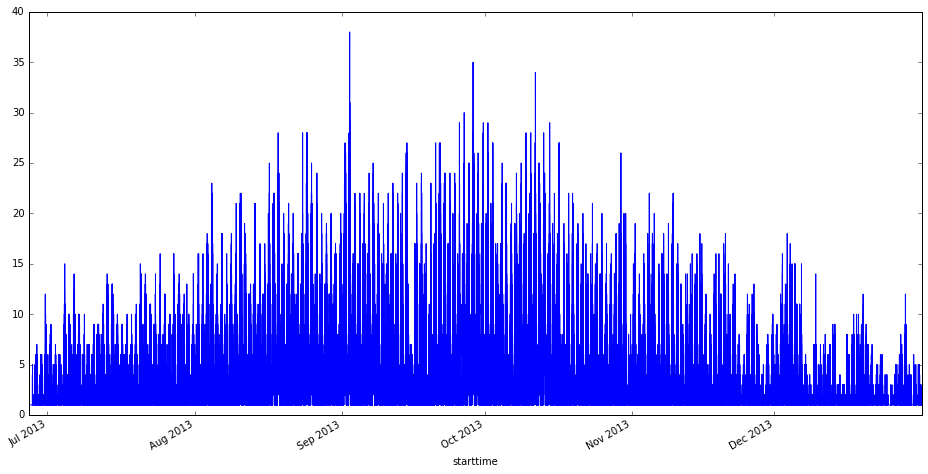

In [45]:
divvy.groupby('starttime').size().plot(figsize=(16,8))

(0, 5000)

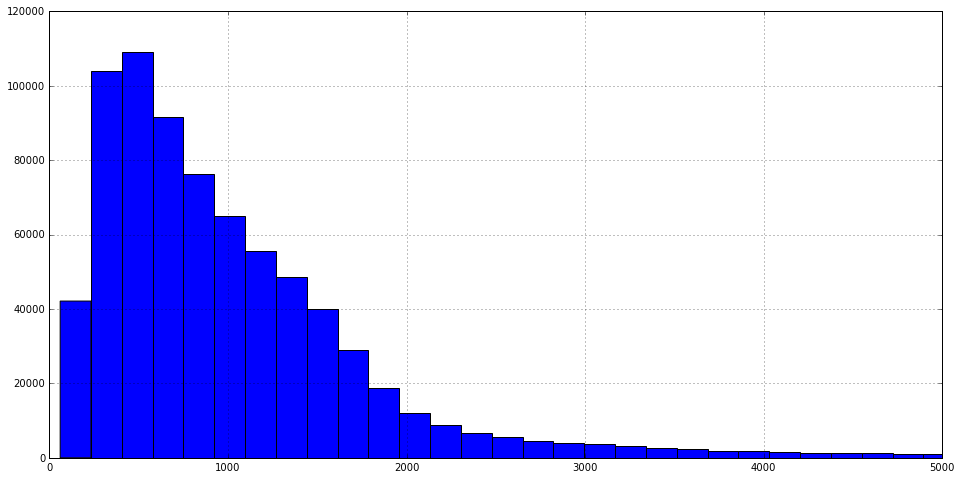

In [48]:
divvy.tripduration.hist(figsize=(16,8), bins=500)
plt.xlim(0,5000) #use bins to set histogram width

In [50]:
duration_counts = divvy.tripduration.value_counts()
duration_counts.index.name = 'seconds'
duration_counts.name = 'trips'
duration_counts.head()

seconds
408    712
399    711
346    706
379    701
415    700
Name: trips, dtype: int64

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(....) is deprecated, use sort_index(.....)


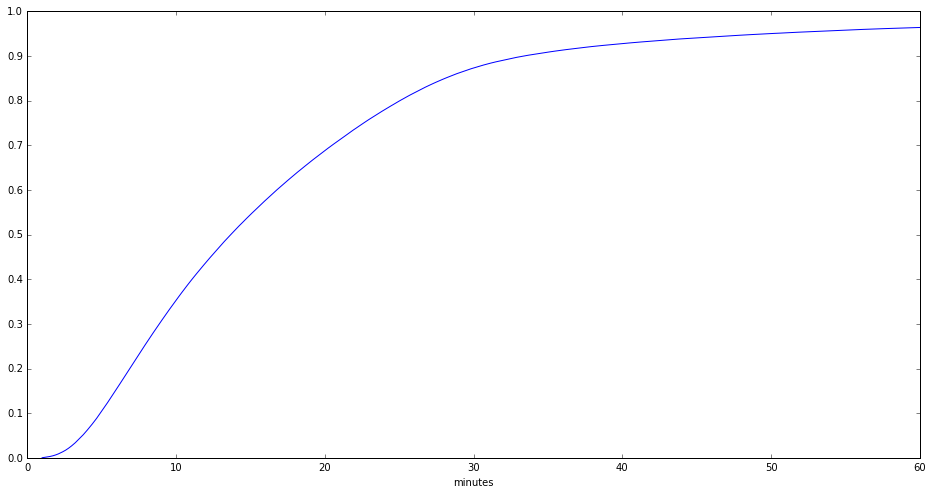

In [51]:
df = duration_counts.reset_index()
df['minutes'] = df.seconds/60.
df.set_index('minutes', inplace=True)
df.sort(inplace=True)


(df.trips.cumsum() / df.trips.sum()).plot(figsize=(16,8))
plt.xlim(0, 60)
plt.yticks(np.arange(0, 1.1, 0.1));

C:\Users\hanna\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: order is deprecated, use sort_values(...)
  from ipykernel import kernelapp as app


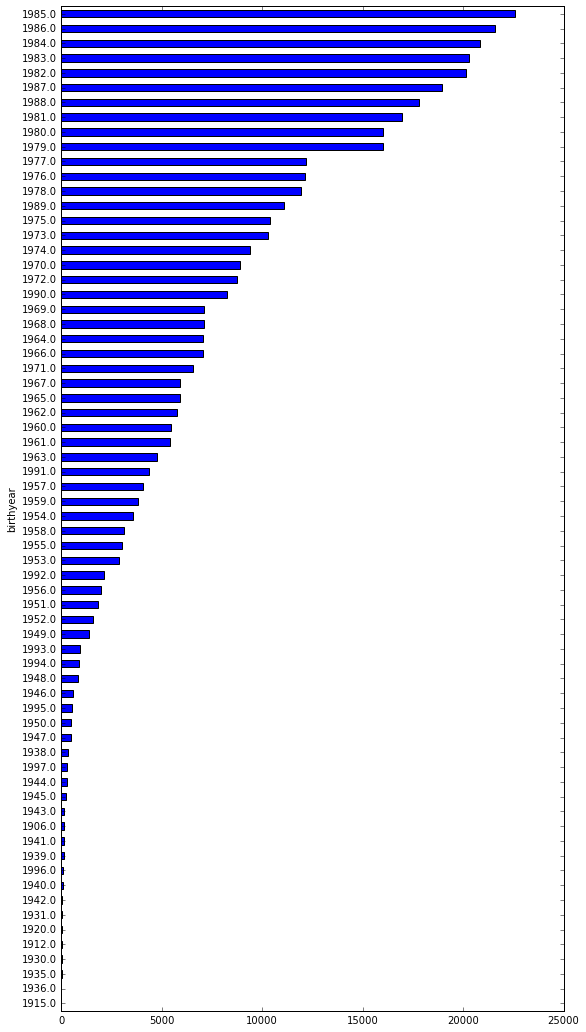

In [52]:
plt.figure(figsize=(9, 18))
divvy.groupby('birthyear').size().order().plot(kind='barh')

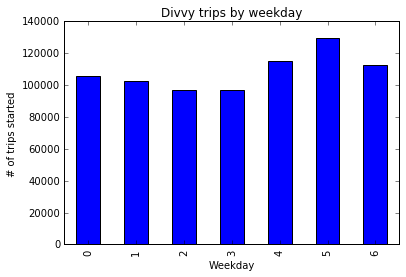

In [53]:
divvy.groupby(divvy['starttime'].apply(lambda d: d.dayofweek))['trip_id'].count().plot(kind='bar')
plt.title('Divvy trips by weekday') # 0 = Monday ...
plt.xlabel('Weekday')
plt.ylabel('# of trips started');

In [55]:
divvy['startdate'] = divvy.starttime.apply(lambda d: d.date())
by_gender = divvy.groupby(['startdate', 'gender']).size()

by_gender.head()

startdate   gender
2013-06-27  Female     14
            Male       45
2013-06-28  Female     75
            Male      322
2013-06-29  Female     42
dtype: int64

In [56]:
by_gender.unstack(1).head()

gender,Female,Male
startdate,,
2013-06-27,14,45
2013-06-28,75,322
2013-06-29,42,163
2013-06-30,47,179
2013-07-01,87,450


In [57]:
# SELECT startdate
#    , COUNT(IF(gender = 'Female', 1, NULL))
#    , COUNT(IF(gender = 'Male', 1, NULL))
# FROM divvy
# GROUP BY startdate
# LIMIT 5;
divvy.groupby(['startdate', 'gender']).size().unstack(1).head()

gender,Female,Male
startdate,,
2013-06-27,14,45
2013-06-28,75,322
2013-06-29,42,163
2013-06-30,47,179
2013-07-01,87,450


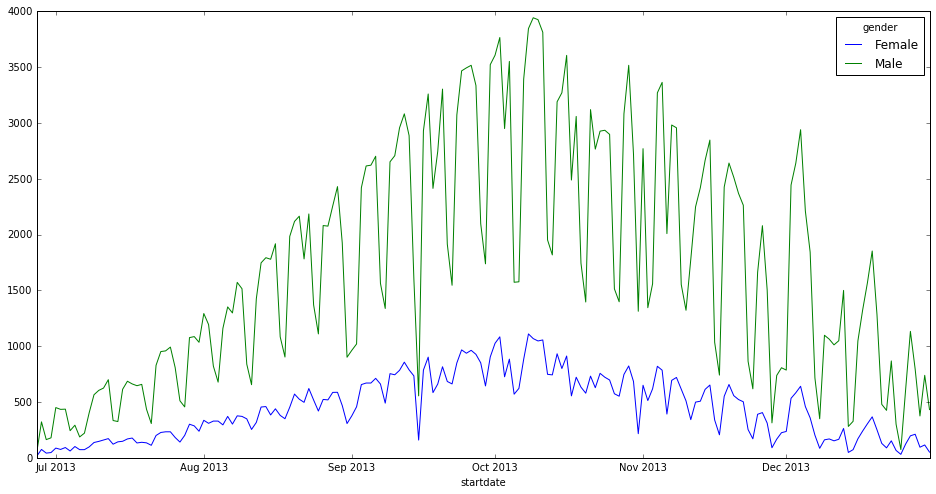

In [58]:
by_gender.unstack(1).plot(figsize=(16,8))

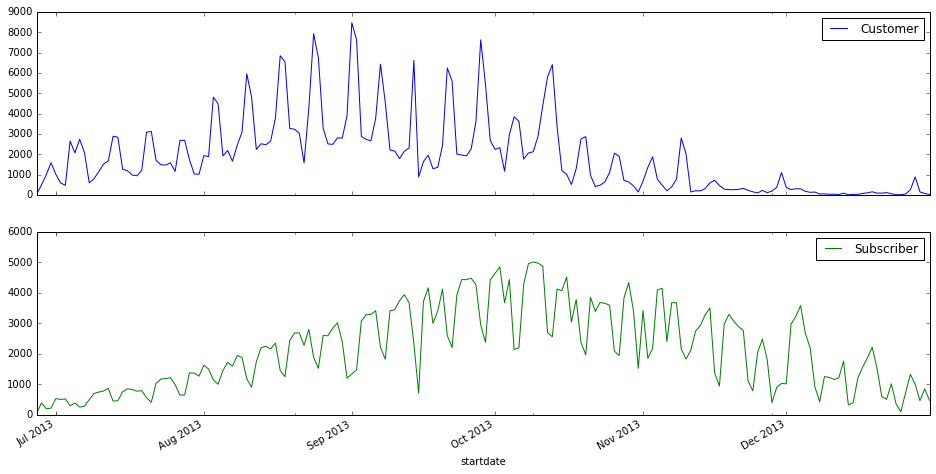

In [59]:
divvy.groupby(['startdate', 'usertype']).size().unstack(1).plot(figsize=(16,8), subplots=True);

In [60]:
weekdays = divvy['starttime'].apply(lambda d: d.dayofweek)
hours = divvy['starttime'].apply(lambda d: d.hour)
by_weekday_hour = divvy.groupby([weekdays, hours])['trip_id'].count()
by_weekday_hour.index.names = ['weekday', 'hour'] # rename MultiIndex

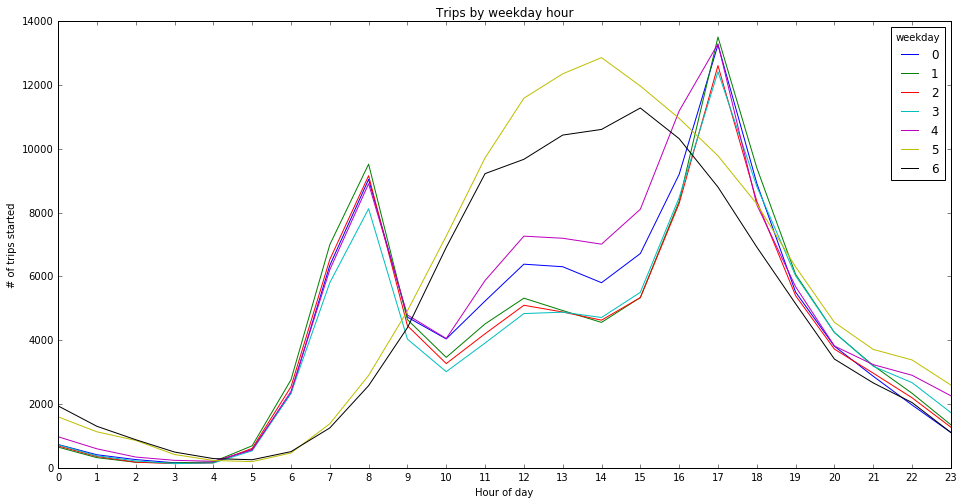

In [61]:
by_weekday_hour.unstack(0).plot(figsize=(16,8))
plt.title('Trips by weekday hour')
plt.ylabel('# of trips started')
plt.xlabel('Hour of day')
plt.xticks(range(24))
plt.xlim(0, 23);